In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 30 - Residuals

In [3]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

In [4]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


In [5]:
def standard_units(any_numbers):
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

# t is a table; x and y are column labels

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(t, x, y):
    r = correlation(t, x, y)
    return r * np.std(t.column(y))/np.std(t.column(x))

def intercept(t, x, y):
    a = slope(t, x, y)
    return np.mean(t.column(y)) - a * np.mean(t.column(x))

def fitted_values(t, x, y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

def residuals(t, x, y):
    return t.column(y) - fitted_values(t, x, y)    

In [6]:
heights = heights.with_column(
    'Fitted Value', fitted_values(heights, 'MidParent', 'Child'),
    'Residual', residuals(heights, 'MidParent', 'Child')
)
heights

MidParent,Child,Fitted Value,Residual
75.43,73.2,70.7124,2.48763
75.43,69.2,70.7124,-1.51237
75.43,69,70.7124,-1.71237
75.43,69,70.7124,-1.71237
73.66,73.5,69.5842,3.91576
73.66,72.5,69.5842,2.91576
73.66,65.5,69.5842,-4.08424
73.66,65.5,69.5842,-4.08424
72.06,71,68.5645,2.43553
72.06,68,68.5645,-0.564467


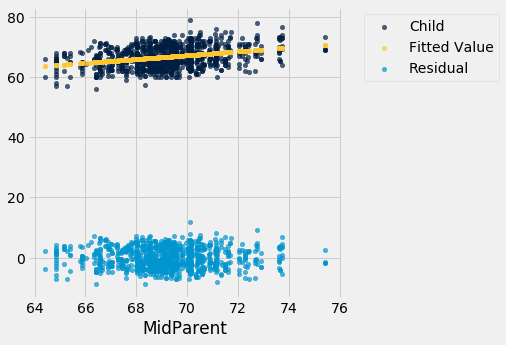

In [7]:
heights.scatter(0)

In [8]:
def plot_residuals(t, x, y):
    tbl = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    tbl.select(x, y, 'Fitted').scatter(0)
    tbl.scatter(x, 'Residual')

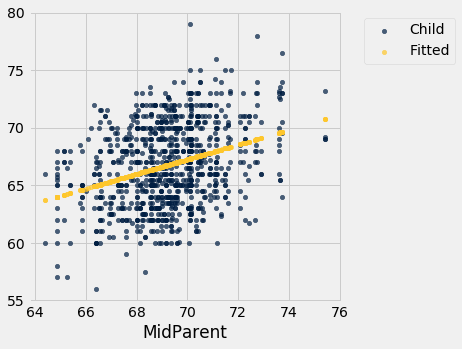

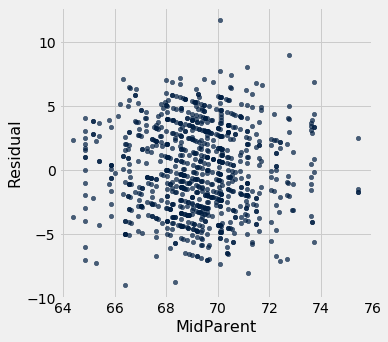

In [9]:
plot_residuals(heights, 'MidParent', 'Child')

## Nonlinearity ##

In [10]:
dugong = Table.read_table('dugong.csv')

In [11]:
dugong.show()

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5
2.27,4
2.15,5
2.26,5
2.35,7
2.47,8


In [12]:
correlation(dugong, 'Length', 'Age')

0.8296474554905714

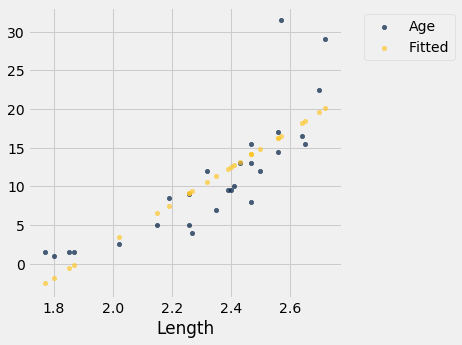

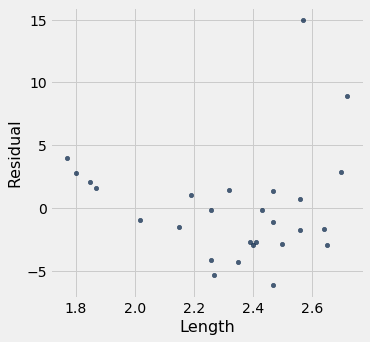

In [13]:
plot_residuals(dugong, 'Length', 'Age')

In [14]:
data = Table.read_table('us_women.csv')

In [15]:
data

height,ave weight
58,115
59,117
60,120
61,123
62,126
63,129
64,132
65,135
66,139
67,142


In [16]:
correlation(data, 0, 1)

0.9954947677842161

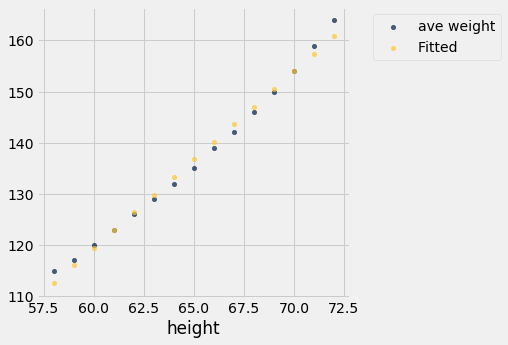

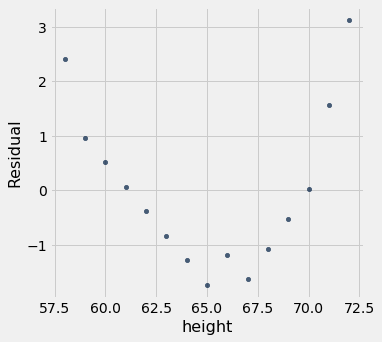

In [17]:
plot_residuals(data, 0, 1)

## Average of Residuals ##

In [18]:
round(np.average(residuals(dugong, 'Length', 'Age')), 6)

0.0

In [19]:
round(np.average(residuals(heights, 'MidParent', 'Child')), 6)

0.0

## A Measure of Clustering ##

In [20]:
def plot_fitted(t, x, y):
    tbl = t.select(x, y)
    tbl.with_columns('Fitted Value', fitted_values(t, x, y)).scatter(0)

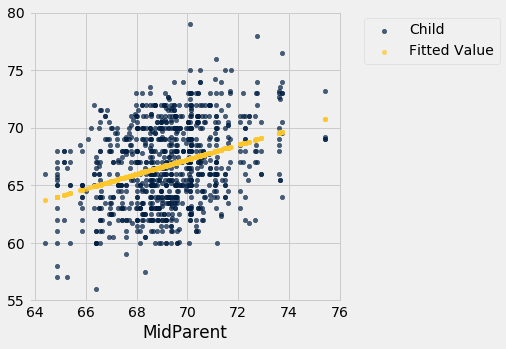

In [21]:
plot_fitted(heights, 0, 1 )

In [23]:
np.std(fitted_values(heights, 0, 1)), np.std(heights.column(1))

(1.148145168378806, 3.5773346010057634)

In [24]:
np.std(fitted_values(heights, 0, 1)) / np.std(heights.column(1))

0.32094989606395957

In [25]:
correlation(heights, 0, 1)

0.32094989606395924

In [26]:
correlation(dugong, 0, 1)

0.8296474554905714

In [27]:
np.std(fitted_values(dugong, 0, 1)) / np.std(dugong.column(1))

0.8296474554905713

In [30]:
hybrid = Table.read_table('hybrid.csv')

In [32]:
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


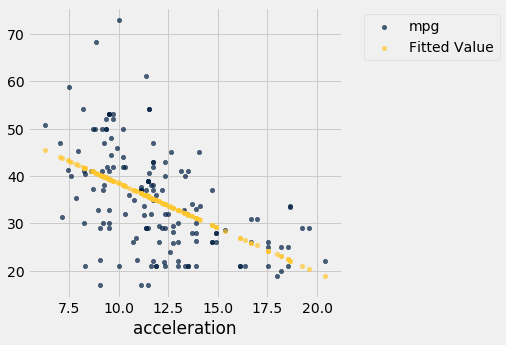

In [33]:
plot_fitted(hybrid, 3, 4)

In [34]:
correlation(hybrid, 'acceleration', 'mpg')

-0.5060703843771186

In [35]:
np.std(fitted_values(hybrid, 'acceleration', 'mpg'))/np.std(hybrid.column('mpg'))

0.5060703843771186

No matter what the shape of the scatter plot, the SD of the fitted values is a fraction of the SD of the observed values of $y$. The fraction is |r|.

$$
\frac{\mbox{SD of fitted values}}{\mbox{SD of }y} ~=~ |r| ~~~~~~~~~~ \mbox{That is,} ~~ \mbox{SD of fitted values} = |r|\cdot \mbox{SD of }y
$$

## SD of the Residuals ##
No matter what the shape of the scatter plot, the SD of the residuals is a fraction of the SD of the observed values of $y$. The fraction is  $\sqrt{1-r^2}$.

$$
\mbox{SD of residuals} ~=~ \sqrt{1 - r^2} \cdot \mbox{SD of }y
$$

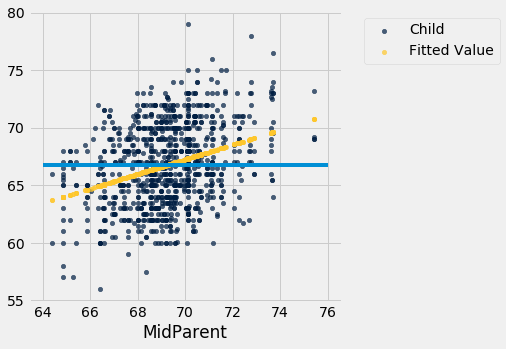

In [36]:
plot_fitted(heights, 'MidParent', 'Child')
ave_child = np.mean(heights.column('Child'))
plots.plot([64, 76], [ave_child, ave_child]);

In [37]:
np.std(residuals(heights, 'MidParent', 'Child'))

3.3880799163953426

In [38]:
r = correlation(heights, 'MidParent', 'Child')
r

0.32094989606395924

In [39]:
np.sqrt(1 - r**2) * np.std(heights.column('Child'))

3.388079916395342

In [40]:
np.std(residuals(hybrid, 'acceleration', 'mpg'))

9.43273683343029

In [41]:
r = correlation(hybrid, 'acceleration', 'mpg')
r

-0.5060703843771186

In [42]:
np.sqrt(1 - r**2)*np.std(hybrid.column('mpg'))

9.43273683343029